<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
* ```airports_nearest``` — расстояние до ближайшего аэропорта в метрах (м)
* ```balcony``` — число балконов
* ```ceiling_height``` — высота потолков (м)
* ```cityCenters_nearest``` — расстояние до центра города (м)
* ```days_exposition``` — сколько дней было размещено объявление (от публикации до снятия)
* ```first_day_exposition``` — дата публикации
* ```floor``` — этаж
* ```floors_total``` — всего этажей в доме
* ```is_apartment``` — апартаменты (булев тип)
* ```kitchen_area``` — площадь кухни в квадратных метрах (м²)
* ```last_price``` — цена на момент снятия с публикации
* ```living_area``` — жилая площадь в квадратных метрах (м²)
* ```locality_name``` — название населённого пункта
* ```open_plan``` — свободная планировка (булев тип)
* ```parks_around3000``` — число парков в радиусе 3 км
* ```parks_nearest``` — расстояние до ближайшего парка (м)
* ```ponds_around3000``` — число водоёмов в радиусе 3 км
* ```ponds_nearest``` — расстояние до ближайшего водоёма (м)
* ```rooms``` — число комнат
* ```studio``` — квартира-студия (булев тип)
* ```total_area``` — площадь квартиры в квадратных метрах (м²)
* ```total_images``` — число фотографий квартиры в объявлении

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

In [3]:
pd.options.display.max_columns = 30

## Изучение данных из файла

In [4]:
data_raw = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [5]:
data_raw

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data_raw.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data_raw.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Пропущены следующие данные: 
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition  
  
Изучим подробнее пропуски в следующем шаге.  
Также нужно изменить типы данных в столбцах first_day_exposition, last_price, floors_total, is_apartment, balcony, parks_around3000, ponds_around3000, days_exposition

## Предобработка данных

In [9]:
data = data_raw.copy()

В нашей выборке есть данные количеством этажей 1. Многоквартирные дома начинаются от 2 этажей.  
Также есть аномально высокие знаечния. Согалсно статье https://lenobldoma.ru/doma-po-etazham самый выскоий дом в ленинградской обалсти имеет 29 этажей.  
Удалим записи с количеством этажей равным 1 и более 29.

In [10]:
data = data[~(data.floors_total == 1) & ~(data.floors_total > 29)]

Записи с пропущенным населенном пунктом или количество этажей удалим. Таких у нас 86 и 56 записей.

In [11]:
data.dropna(subset=['locality_name', 'floors_total'], inplace=True)

living_area, kitchen_area нужны для наших расчетов, заполним их произведением общей площади на корреляцию общей площади от соовтетсвующего параметра.
В студиях же не будем трогать kitchen_area, так как там нет кухни как таковой.

In [12]:
data.loc[data.living_area.isna(), 'living_area'] = data[data.living_area.isna()]['total_area'] * data.living_area.corr(data.total_area)

In [13]:
data[data.studio == True]['kitchen_area'].unique()

array([nan])

In [14]:
data.loc[(data.studio == False) & (data.kitchen_area.isna()), 'kitchen_area'] = \
 data[(data.studio == False) & (data.kitchen_area.isna())]['total_area'] * \
 data[data.studio == False]['kitchen_area'].corr(data.total_area)

В столбцах ponds_around3000, parks_around3000, balcony пропущенные значения означают отсутсвие. Заменим пустые значения на соответсвующие.  
В ponds_nearest и parks_nearest не будем заполнять пропуски, так как нет возможности высчитать расстояние. Стоит указать дата-инженерам/разработчикам.

In [15]:
data.balcony.fillna(0, inplace=True)
data.balcony.isna().sum()

0

In [16]:
data.ponds_around3000.fillna(0, inplace=True)
data.ponds_around3000.isna().sum()

0

In [17]:
data.parks_around3000.fillna(0, inplace=True)
data.parks_around3000.isna().sum()

0

В столбце is_apartment заменям пустые значения на False и поменяем тип данных в столбце на bool

In [18]:
data.is_apartment.fillna(False, inplace=True)
data.is_apartment.isna().sum()

0

In [19]:
data.is_apartment = data.is_apartment.astype('bool')

Поменяем тип данных столбца с датой.

In [20]:
data.first_day_exposition = pd.to_datetime(data.first_day_exposition, format='%Y-%m-%dT%H:%M:%S')

Заполним пропуски в высоте потолков по следующему алгоритму:
- если певрый этаж, возьмем медианное значение высоты потолков на 1 этаже в домах с такой же этажностью;
- если последний этаж, то медианными значениями на последнем этаже домов с такой же этажностью;
- иначе медианными значениями медианными значениями домов с такой же этажностью.

In [21]:
def make_height(row):
    if row.floor == 1: 
        return data[(data.floor == 1) & (data.floors_total == row.floors_total)].ceiling_height.median()
    elif (row.floor == row.floors_total): 
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning) 
            height = data[(data.floor == data.floors_total) & (data.floors_total == row.floors_total)].ceiling_height.median()
            #в наших данных всего 6 записей с квартирами на 21 этаже в 21-этажнме доме, и у всех нету данных по высоте потолков
            #поэтому такой костыль
            if ~(height > 0): next
            else: return height

    return data[data.floors_total == row.floors_total].ceiling_height.median()

In [22]:
data.loc[data.ceiling_height.isna(), 'ceiling_height'] = (
    data[data.ceiling_height.isna()]
    .apply(make_height, axis=1))

Также пропущены значения в airports_nearest - не можем вычислить в виду отсутсвия данных.  
В случае с пропускмаи в cityCenters_nearest - некоторые объекты недвижимости находятся не в городе, поэтому значения пропущены. В случае городов - вычислить не можем.

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              145
balcony                     0
locality_name               0
airports_nearest         5505
cityCenters_nearest      5482
parks_around3000            0
parks_nearest           15483
ponds_around3000            0
ponds_nearest           14507
days_exposition          3159
dtype: int64

Пропущенные значения days_exposition заменим на 0 и поменяем тип данных на целочисленный.  
При дальнейшем анализе будем учитывать, что 0 - означет не продано. До этого минимальное значе в столбце было - 0.

In [24]:
data.days_exposition = data.days_exposition.fillna(0).astype('int')

Заменим типы данных столбцов last_price, floors_total, balcony, parks_around3000, ponds_around3000 на целочисленные.

In [25]:
data.last_price = data.last_price.astype('int')
data.floors_total = data.floors_total.astype('int')
data.balcony = data.balcony.astype('int')
data.parks_around3000 = data.parks_around3000.astype('int')
data.ponds_around3000 = data.ponds_around3000.astype('int')

## Расчёты и добавление результатов в таблицу

Добавим
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.


Цена квадратного метра.

In [26]:
data['m_price'] = round(data.last_price / data.total_area, 2)

День недели публикации объявления.

In [27]:
data['day_of_public'] = pd.DatetimeIndex(data.first_day_exposition).dayofweek

Месяц публикации объявления.

In [28]:
data['month_of_public'] = pd.DatetimeIndex(data.first_day_exposition).month

Год публикации объяления.

In [29]:
data['year_of_public'] = pd.DatetimeIndex(data.first_day_exposition).year

Напишем функцию для определения этажа и применим ее.

In [30]:
def what_the_floor(row):
    if row.floor == 1: return 'первый'
    if row.floor == row.floors_total: return 'последний'
    return 'другой'

In [31]:
data['first_last_floor'] = data.apply(what_the_floor, axis=1)

Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [32]:
data['living_to_total_area'] = round(data.living_area / data.total_area, 2)

In [33]:
data['kitchen_to_living_area'] = round(data.kitchen_area / data.living_area, 2)

In [34]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_price,day_of_public,month_of_public,year_of_public,first_last_floor,living_to_total_area,kitchen_to_living_area
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.37,3,3,2019,другой,0.47,0.49
1,7,3350000,40.40,2018-12-04,1,2.715,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,0.46,0.59
2,10,5196000,56.00,2015-08-20,2,2.550,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,0.61,0.24
3,0,64900000,159.00,2015-07-24,3,2.600,14,149.446418,9,False,False,False,96.937629,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,0.94,0.65
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,0.32,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.700,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,0,72490.85,1,3,2017,другой,0.55,0.19
23695,14,3100000,59.00,2018-01-15,3,2.550,5,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,0,NaN,0,NaN,45,52542.37,0,1,2018,другой,0.64,0.22
23696,18,2500000,56.70,2018-02-11,2,2.750,3,29.700000,1,False,False,False,34.568324,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,0,44091.71,6,2,2018,первый,0.52,1.16
23697,13,11475000,76.75,2017-03-28,2,3.000,17,72.138444,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,149511.40,1,3,2017,другой,0.94,0.32


## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков

In [35]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23508.000000,2.350800e+04,23508.000000,23508.000000
mean,60.322114,6.543942e+06,2.070827,2.733409
std,35.685334,1.092298e+07,1.079222,0.982250
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.648500e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


<AxesSubplot:>

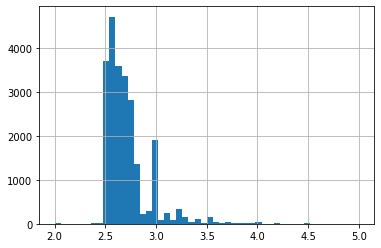

In [36]:
data.ceiling_height.hist(bins=50, range=(2, 5))

В основном высота потолков в наших записях от 2.5 до 3.


<AxesSubplot:>

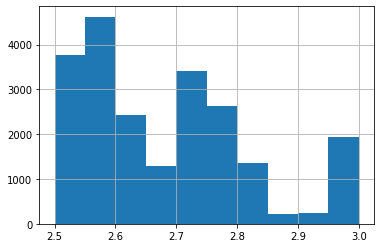

In [37]:
data.ceiling_height.hist(range=(2.5, 3))

In [38]:
data[(data.ceiling_height < 2.5) | (data.ceiling_height > 3)].ceiling_height.count()

1594

Наиболее часто встречающаяся высота 2.5-2.55 м.

Избавимся от записей, не подходящих под наший условия.

In [39]:
data = data[(data.ceiling_height >= 2.5) & (data.ceiling_height <= 3)]

<AxesSubplot:>

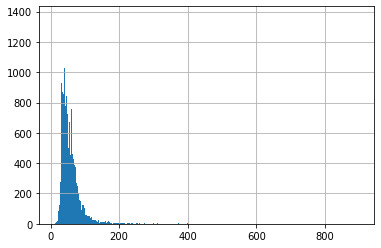

In [40]:
data.total_area.hist(bins=500)

In [41]:
data[data.total_area > 100].total_area.count()

1242

В площади также имеются аномальнов высокие значения. Уберем из нашей выборки квартиры площадью более 100 кв.м. 

<AxesSubplot:>

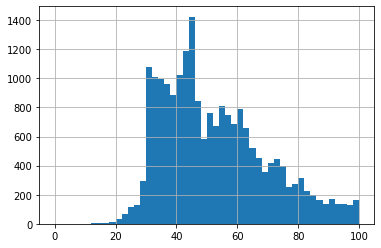

In [42]:
data.total_area.hist(bins=50, range=(0,100))

В основном площадь недвижимости в нашей выгрузке от 30 до 65 кв.м.

In [43]:
data = data[data.total_area < 100]

<AxesSubplot:>

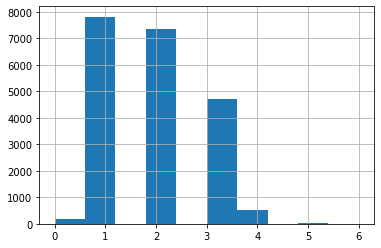

In [44]:
data.rooms.hist(bins=10)

Квартиры с количество комнат > 4 встрчеаются редко, уберем их из анализа.

In [45]:
data = data[data.rooms <= 4]

<AxesSubplot:>

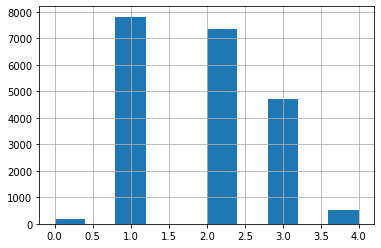

In [46]:
data.rooms.hist()

Чаще всего встречается недвижимость с 1 или 2 комнатами. Студий и вариантов с 4 комнатами совсем мало.

<AxesSubplot:>

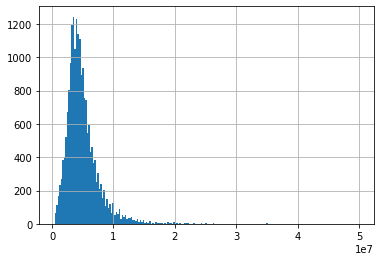

In [47]:
data.last_price.hist(bins=200)

Стоимость большинства квартир менее 10 000 000, уберем остальные квартиры из анализа.

<AxesSubplot:>

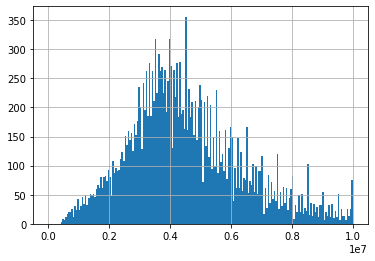

In [102]:
data.last_price.hist(bins=200, range=(0, 1*1e7))

In [103]:
data = data[data.last_price <= 1*1e7]

В основном недвидимость продается от 2 до 6 млн.

Изучим время продажи квартиры. 0 в наших значениях означает, что квартира еще в продаже.

In [104]:
data_sold = data[data.days_exposition > 0]

<AxesSubplot:>

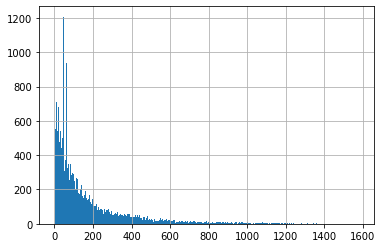

In [105]:
data_sold.days_exposition.hist(bins=300)

В основном квартиры продаются в первые 100 дней.

<AxesSubplot:>

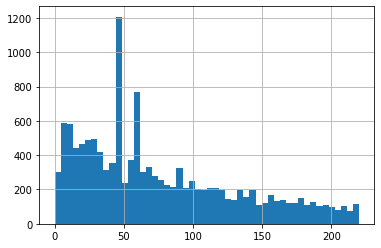

In [106]:
data_sold.days_exposition.hist(bins=50, range=(0,220))

In [107]:
data_sold.days_exposition.describe()

count    17410.000000
mean       167.580184
std        205.331390
min          1.000000
25%         43.000000
50%         89.000000
75%        212.000000
max       1580.000000
Name: days_exposition, dtype: float64

В 50% случаев продажа квартиры занимает <= 90 дней. В первые 43 дня продается всего 25% квартир.  
Встречаются случаи, когда квартиры продаются и более 2-х лет.  
Межквартильынй размах - стандартная продажа, то есть от 43 до 215 дней от дня пуликации объявления заниамет продажа квартиры.
Будем считать, что продажа прошла необычно быстро при сроке менее 10 дней, а необычно долго более 215 дней.

Рассмотрим, какие факторы больше всего влияют на стоимость квартиры:
- изучим, зависит ли цена от площади, числа комнат, удалённости от центра;
- изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом; 
- также изучим зависимость от даты размещения: дня недели, месяца и года.

In [108]:
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.645126,0.396015,-0.305622
total_area,0.645126,1.000000,0.805228,-0.053121
rooms,0.396015,0.805228,1.000000,-0.021313
cityCenters_nearest,-0.305622,-0.053121,-0.021313,1.000000


Стоимость в большей степени зависит от площади квартиры, которая в свую очередь сильно зависит от количества комнат. Удаленность от центра также влияет на стоимость, но не так сильно.

In [109]:
data.first_last_floor.value_counts()

другой       14459
последний     2660
первый        2559
Name: first_last_floor, dtype: int64

In [110]:
data_floor = data.pivot_table(index='first_last_floor', values='last_price', aggfunc=['min', 'max', 'median'])

In [111]:
data_floor.columns = ['min', 'max', 'median']

In [112]:
data_floor.sort_values(by='median', ascending=False)

,min,max,median
first_last_floor,,,
другой,450000,10000000,4400000
последний,430000,10000000,3850000
первый,430000,10000000,3700000


In [130]:
sns.set_theme(style='whitegrid')

<AxesSubplot:xlabel='first_last_floor', ylabel='last_price'>

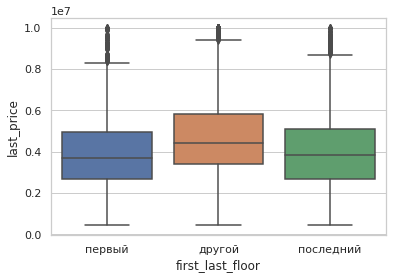

In [131]:
sns.boxplot(x='first_last_floor', y='last_price', data=data)

В среднем стоимость квартир, не находящихся на первом или последнем этаже ниже. При этом квартиры на первом этаже дешевле квартир на последнем этаже.

<AxesSubplot:xlabel='day_of_public', ylabel='last_price'>

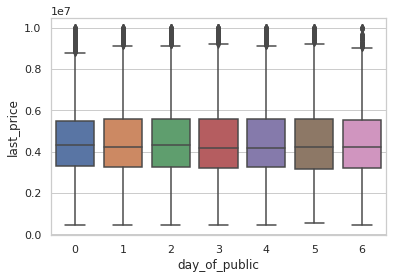

In [133]:
sns.boxplot(x='day_of_public', y='last_price', data=data)

<AxesSubplot:xlabel='month_of_public', ylabel='last_price'>

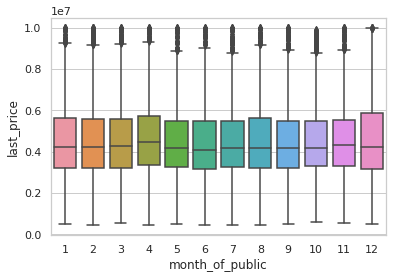

In [137]:
sns.boxplot(x='month_of_public', y='last_price', data=data)

<AxesSubplot:xlabel='year_of_public', ylabel='last_price'>

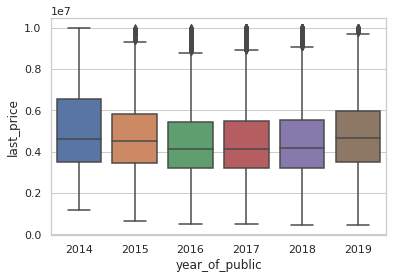

In [135]:
sns.boxplot(x='year_of_public', y='last_price', data=data)

Зависимости дня недели, месяца или года на стоимость квартиры не наблюдается.

Выберем 10 населённых пунктов с наибольшим числом объявлений и осчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [66]:
top10_location = data.groupby('locality_name')['rooms'].count().sort_values(ascending=False).head(10)

In [67]:
top10_location

locality_name
Санкт-Петербург      12577
посёлок Мурино         516
посёлок Шушары         429
Всеволожск             385
посёлок Парголово      323
Колпино                322
Пушкин                 319
деревня Кудрово        297
Гатчина                295
Выборг                 210
Name: rooms, dtype: int64

In [68]:
data[data.locality_name.isin(top10_location.index)].groupby('locality_name').m_price.median().sort_values(ascending=False)

locality_name
Санкт-Петербург      102083.330
Пушкин                98437.500
посёлок Парголово     92051.280
деревня Кудрово       91803.280
посёлок Мурино        86076.875
посёлок Шушары        76923.080
Колпино               74729.185
Гатчина               67796.610
Всеволожск            65686.270
Выборг                57860.640
Name: m_price, dtype: float64

Самая высокая средняя цена за квадратный метр в нашей выборке в г. Санкт-Петербург, а самая низкая - Всеволожск.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> 👍

Выясним, какая область входит в центр Санкт-Петербурга:
- создадим столбец с расстоянием до центра в километрах: округлим до целых значений; 
- после этого посчитаем среднюю цену для каждого километра; 
- построим график: он должен показывать, как цена зависит от удалённости от центра;
- определим границу, где график сильно меняется, — это и будет центральная зона.

In [69]:
data_spb = data[data.locality_name == 'Санкт-Петербург']

In [70]:
data_spb['km_to_center'] = data_spb.cityCenters_nearest / 1000

/tmp/ipykernel_36/1197778740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['km_to_center'] = data_spb.cityCenters_nearest / 1000


In [71]:
data_spb.km_to_center = data_spb.km_to_center.round()

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='km_to_center'>

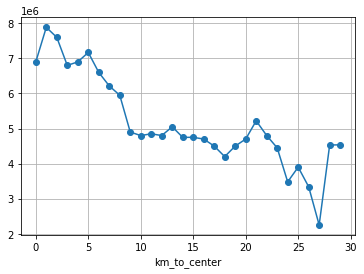

In [72]:
data_spb.groupby('km_to_center').last_price.median().plot(style='o-', grid=True)

Видно снижение цен начиная с 6-го километр. Будем счтать центром отдальнесть 5 и менее км.

Выделим сегмент квартир в центре и проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.  
Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [73]:
data_spb_center = data_spb[data_spb.km_to_center <= 5]

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'last_price'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

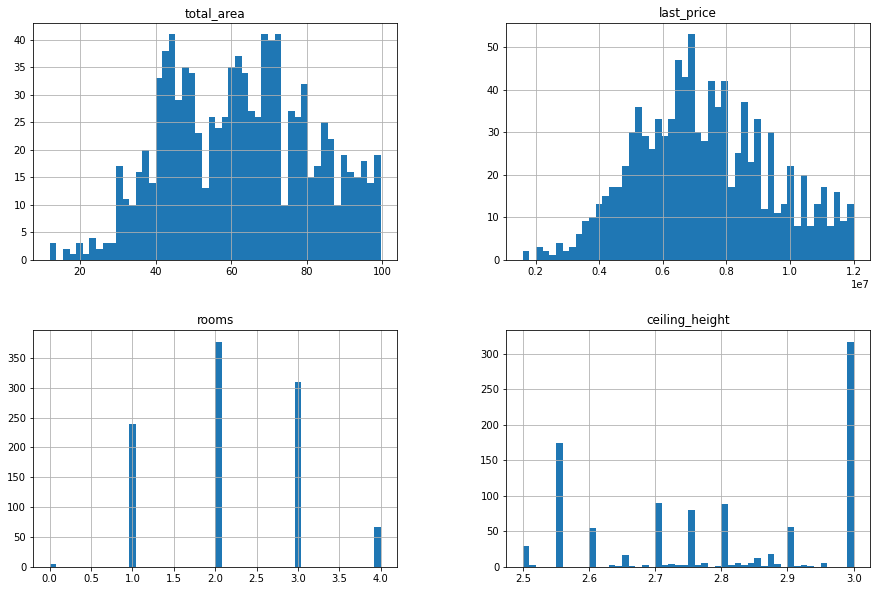

In [74]:
data_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].hist(figsize=(15,10), bins = 50)

В центер Санкт Петербурга преобладают 2-комнатные квартиры, квартиры с высотой потолка 3 м., площадью 60 кв. м. стоимостью 7 000 000.

In [145]:
data_spb_center[['floor', 'last_price', 'rooms', 'cityCenters_nearest']].corr()

,floor,last_price,rooms,cityCenters_nearest
floor,1.00000,0.182610,-0.161000,0.244660
last_price,0.18261,1.000000,0.384843,-0.025324
rooms,-0.16100,0.384843,1.000000,-0.149409
cityCenters_nearest,0.24466,-0.025324,-0.149409,1.000000


На стоимость квартир в центер слабо влияет количество комнат. Это объясняется влиянием количества комнат на площадь квартиры.  
Непосредственная близость к центру города квартир, находящихся в центральном районе, никак не влияет на стоимость.

In [76]:
data_spb_center_floor = data_spb_center.pivot_table(index='first_last_floor', values='last_price', aggfunc=['min', 'max', 'median'])
data_spb_center_floor.columns = ['min', 'max', 'median']
data_spb_center_floor

,min,max,median
first_last_floor,,,
другой,2100000,12000000,7400000
первый,1600000,12000000,6050000
последний,3100000,12000000,7300000


<AxesSubplot:xlabel='first_last_floor', ylabel='last_price'>

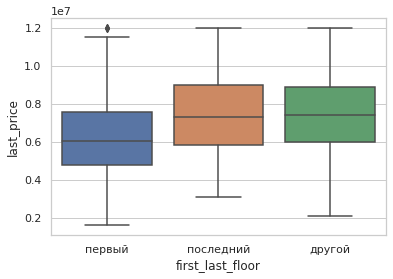

In [138]:
sns.boxplot(x='first_last_floor', y='last_price', data=data_spb_center)

При этом в центре города последние этажи ценятся больше.

<AxesSubplot:xlabel='day_of_public', ylabel='last_price'>

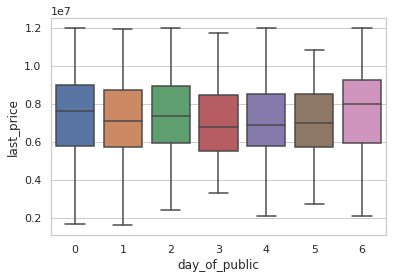

In [147]:
sns.boxplot(x='day_of_public', y='last_price', data=data_spb_center)

<AxesSubplot:xlabel='month_of_public', ylabel='last_price'>

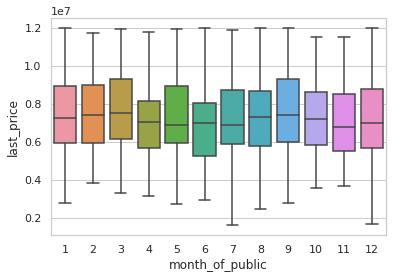

In [148]:
sns.boxplot(x='month_of_public', y='last_price', data=data_spb_center)

<AxesSubplot:xlabel='year_of_public', ylabel='last_price'>

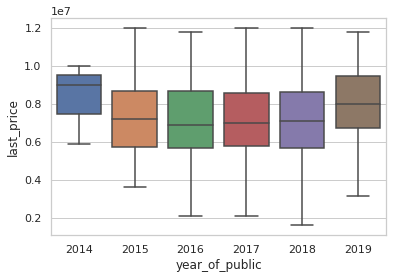

In [149]:
sns.boxplot(x='year_of_public', y='last_price', data=data_spb_center)

Квартиры в центре продавались дешевле с 2015 по 2018 год.
В соатльном ккой-либо заивсимости от даты публикации не наблюдается.

Сравним с общими показателями.

In [144]:
abs(data_spb_center[['floor', 'last_price', 'rooms', 'cityCenters_nearest']].corr()) - abs(data[['floor', 'last_price', 'rooms', 'cityCenters_nearest']].corr())

,floor,last_price,rooms,cityCenters_nearest
floor,0.000000,0.010636,-0.020305,0.203928
last_price,0.010636,0.000000,-0.011172,-0.280298
rooms,-0.020305,-0.011172,0.000000,0.128096
cityCenters_nearest,0.203928,-0.280298,0.128096,0.000000


В общем и целом факторы, влияющие на стоимость недвижимости, для центра города и других вариантов сходятся.
Единственное существенно отличие - в центральном районе непосредственная близость к центру практически не влияет на стоимость.

## Общий вывод

Стоимость недвижимсоти напрямую зависит от площади. Также влияет количество комнат и близость к центру.  
На первых и последних этажах квартиры продают дешевле, за исключением центар города.
В центральном районе города (на примере Санкт-Петербурга в радиусе 5 км от центра) недвижимость на последних этажах продают дороже, на первых же также стоимость ниже других вариантов.
В стандартных вариантах недвижимости высота потолков от 2.5 до 3 м. Остальные варианты встречаются редко.
Также в стандартных объялениях в основном следующие параметры:
- количество комнат <= 4;
- стоимость до 12 000 000;
- площадь <= 100 кв.м.  
  
Стандартный срок продажи недвижимости от 42 до 220 дней.